In [1]:
#Libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_customers = pd.read_excel("/Users/giulianamiranda/Documents/Labs/lab-customer-analysis-round-2/files_for_lab/excel_files/marketing_customer_analysis.xlsx")



In [ ]:
df_customers

In [3]:
# Bonus: funtion to clean and process the data

def clean_and_process(df):
    # Show DataFrame shape
    print("Data shape:", df.shape)

    # Standardizing header names
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]

    # Checking data types
    print("Data types:")
    print(df.dtypes)

    # Checking NaN
    print("NaN value counts:")
    print(df.isnull().sum())
    df.dropna(inplace=True)
    

    # Checking for duplicates
    duplicate_rows = df[df.duplicated()]
    print("Duplicate rows:")
    print(duplicate_rows)

    # Drop the 'vehicle_type' column
    df.drop(['vehicle_type'], inplace=True, axis=1)
    
 
    
    # Show the histograms
    
    def plot_histogram(data, column_name):
        data[column_name] = data[column_name].astype(str)
        sns.histplot(data[column_name])
        plt.show()

    # Responses
    plot_histogram(df, 'response')
    
    # Create a bar plot to visualize the response rate by sales channel using seaborn
    
              # Map 'response' column to numeric values 
    response_mapping = {'No': 0, 'Yes': 1}
    df['response'] = df['response'].map(response_mapping)
    
    grouped = df.groupby('sales_channel')['response'].value_counts(normalize=True).unstack().fillna(0)
    grouped = df.groupby('sales_channel')['response'].mean().reset_index()
    sns.barplot(x='sales_channel', y='response', data=grouped, palette="Blues")

    # Set and plot
    plt.xlabel("Sales Channel")
    plt.ylabel("Response Rate (%)")
    plt.title("Response Rate by Sales Channel")
    plt.show()
    
    grouped.reset_index(inplace=True)
    
    # setting plots
    
    # Select numerical columns
    numerical = df.select_dtypes(include=[np.number])
    
    plt.hist(numerical['customer_lifetime_value'])
    plt.xlabel('Customer Lifetime Value')
    plt.title('Customer Lifetime Value Histogram')
    plt.show()

    plt.hist(numerical['income'])
    plt.xlabel('Income')
    plt.title('Income Histogram')
    plt.show()

    plt.hist(numerical['monthly_premium_auto'])
    plt.xlabel('Monthly Premium Auto')
    plt.title('Monthly Premium Auto Histogram')
    plt.show()

    plt.hist(numerical['months_since_last_claim'])
    plt.xlabel('Months since last claim')
    plt.title('Months since last claim Histogram')
    plt.show()

    plt.hist(numerical['months_since_policy_inception'])
    plt.xlabel('Months since policy inception')
    plt.title('Months since policy inception Histogram')
    plt.show()

    plt.hist(numerical['number_of_open_complaints'])
    plt.xlabel('Number of open complaints')
    plt.title('Number of Open Complaints Histogram')
    plt.show()

    plt.hist(numerical['number_of_policies'])
    plt.xlabel('Number of policies')
    plt.title('Number of Policies Histogram')
    plt.show()

    plt.hist(numerical['total_claim_amount'])
    plt.xlabel('Total claim amount')
    plt.title('Total Claim Amount Histogram')
    plt.show()
    
    # Write code for both the correlation matrix and for seaborn heatmap
    correlations_matrix = numerical.corr()

    sns.heatmap(correlations_matrix, annot=True)
    plt.show()
    mask = np.zeros_like(correlations_matrix)
    mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
    plt.show()
    
    high_corr = [(col1, col2) for col1 in correlations_matrix.columns for col2 in correlations_matrix.columns if col1 != col2 and abs(correlations_matrix[col1][col2]) > 0.9]

    if high_corr:
        for col1, col2 in high_corr:
            if col1 in numerical.columns and col2 in numerical.columns:
                if numerical[col1].std() > numerical[col2].std():
                    numerical.drop(col2, axis=1, inplace=True)
                else:
                    numerical.drop(col1, axis=1, inplace=True)
                print(f"Dropped one of the high-correlation features: {col1} and {col2}")
    else:
        print("No features with high correlation found (greater than 0.9).")
    

    # Select numerical columns
    numerical = df.select_dtypes(include=[np.number])

    
    # Select categorical columns
    categoricals = df.select_dtypes('object')
    
    # One Hot/Label Encoding (categorical)
    
    hot_categoricals = pd.get_dummies(categoricals.drop(['customer'], axis = 1), drop_first = True)

    # Preparing the model, removing the target 'total_claim_amount
     #Normalizing numerical data, dealing with NaN
    
    # Drop missing values for the entire dataset
    df.dropna(inplace=True)
    

    concat2 = pd.merge(numerical, hot_categoricals, left_index=True, right_index=True)

    Y = concat2['total_claim_amount']
    X = concat2.drop(['total_claim_amount'], axis=1) 

    lm = linear_model.LinearRegression()
    model = lm.fit(X,Y)
    model.score(X,Y)

    
     # Normalizing numerical data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(numerical)
    normalized_df = pd.DataFrame(normalized_data, columns=numerical.columns)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
    predictions = lm.predict(X_test) 
    
    
    print("R2 value is = ", round(r2_score(Y_test, predictions), 2))
    print("The intercept of the model is = ", lm.intercept_)
    print("The coefficients of the models are: ", lm.coef_)

   

    return df


Data shape: (10910, 26)
Data types:
unnamed:_0                                int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
rene

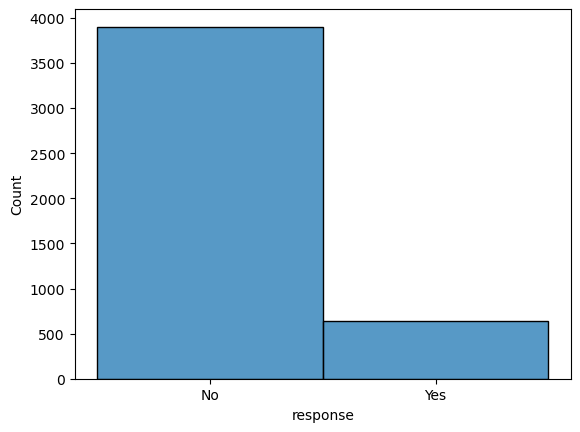

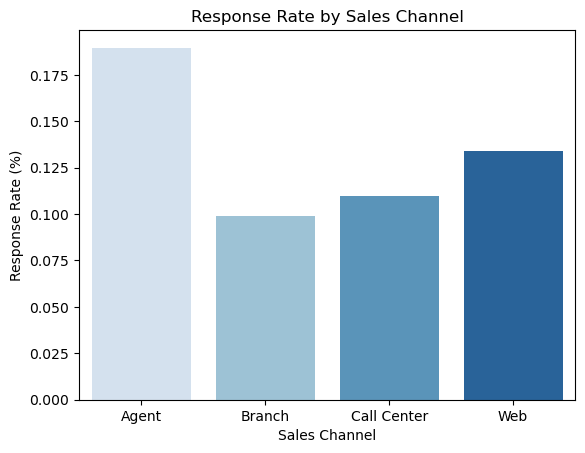

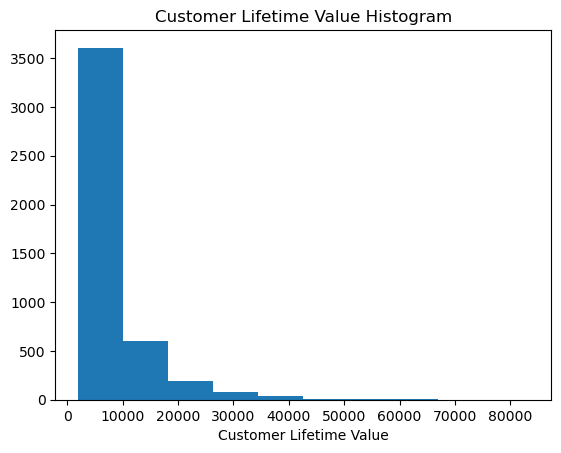

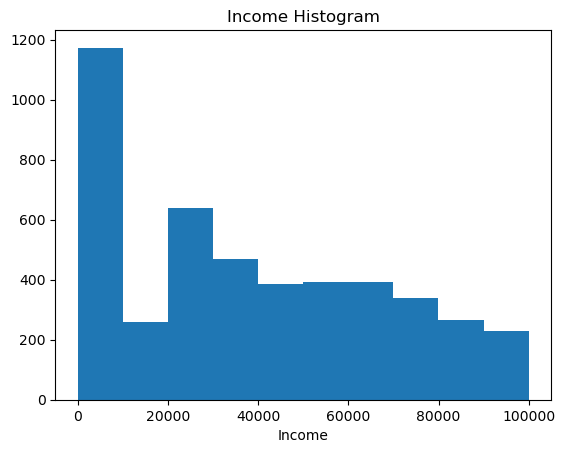

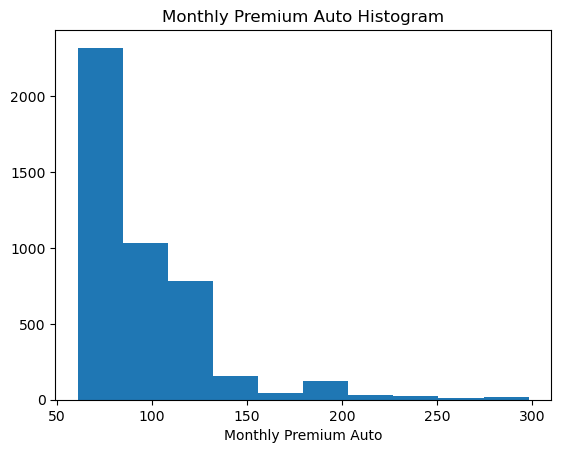

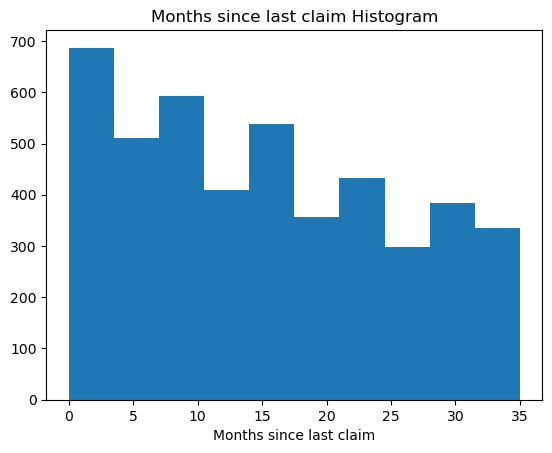

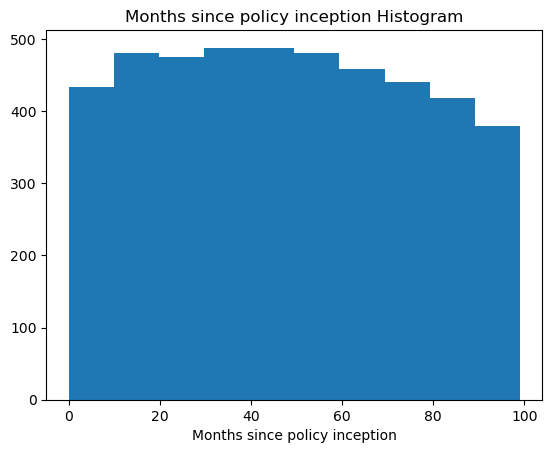

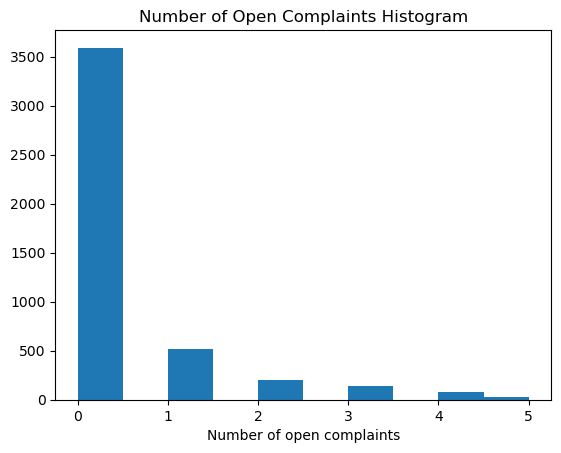

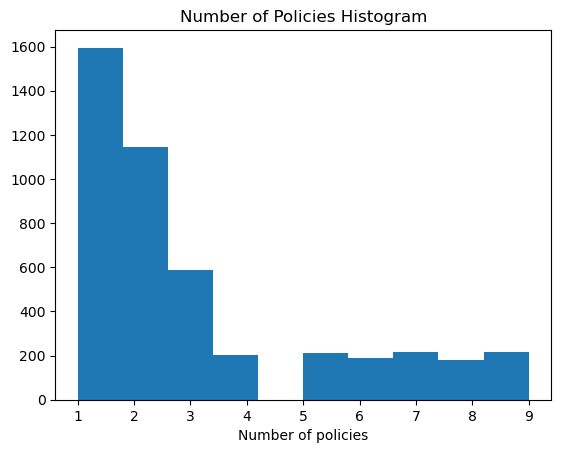

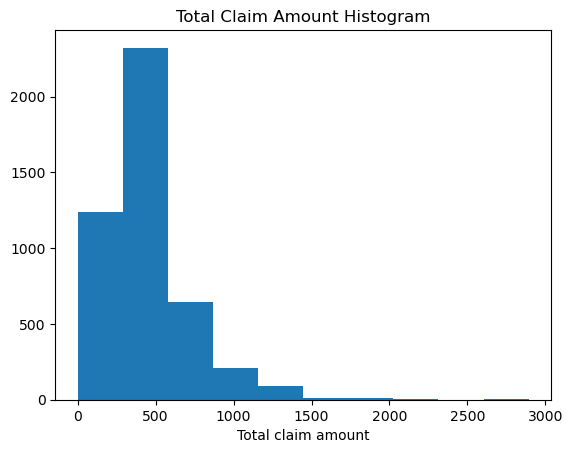

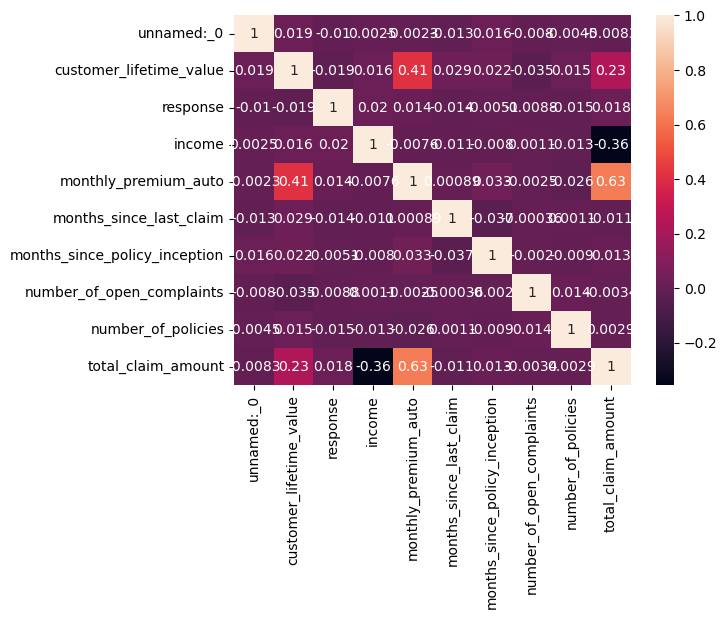

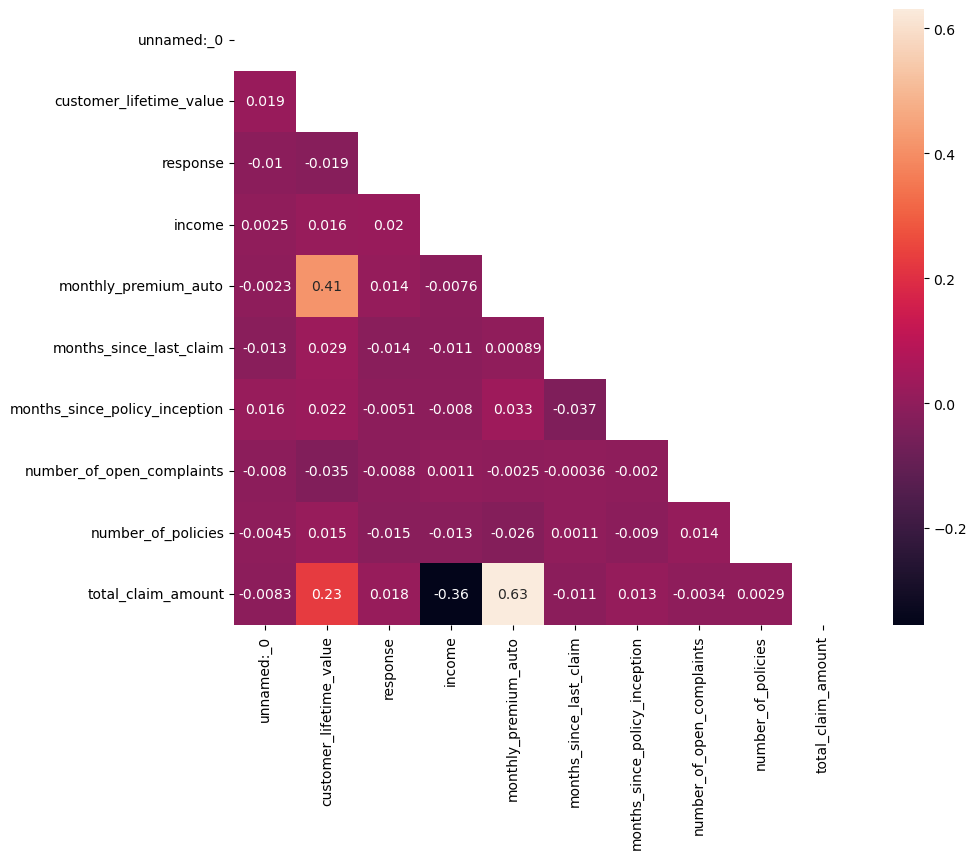

No features with high correlation found (greater than 0.9).
R2 value is =  0.79
The intercept of the model is =  -306.8207528764771
The coefficients of the models are:  [-1.71870421e-04 -7.12926326e-04 -2.60092677e+01 -3.26255214e-04
  4.81105045e+00  2.65984531e-01 -3.14868321e-02 -1.96331063e+00
  1.80948924e+00 -1.41731794e+00 -4.84399897e+00 -4.46304652e+00
 -2.09695013e+00 -3.03599679e+00  7.97305390e+00 -9.88100467e+00
 -1.71292977e+01  9.20329684e+00 -1.82440390e+01 -1.01623228e+01
  1.59835010e+01 -1.56710190e+01  5.72653445e+01  1.86754259e+01
  3.78498850e+02  2.19928342e+02 -1.03132231e+01  6.15958786e+01
  3.84095121e+00  1.47149512e+01 -1.21900072e+01  4.80326671e+00
  7.89459782e+00  1.54985463e+00 -5.60350124e+00  4.46445765e+01
 -1.00052508e+01 -1.99243745e+01  1.31148488e+01  6.57860555e+00
  5.49239832e+00  2.51850039e+00  6.95987950e+00  8.20507607e-01
  7.38947132e+01  5.13053112e+01  6.85200523e+00 -2.12705102e+01
 -1.62179979e+00 -7.37886405e+00  2.79655979e+00]


In [4]:

cleaned_data = clean_and_process(df_customers)



In [ ]:
# Try to improve the linear regression model

# Based on the correlations matrix, I dropped columns that were unbalacing that model, overrepresenting the value or not influencing much

In [12]:
df_customers.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [16]:
df_customers
numerical = df_customers.select_dtypes(include=[np.number])
categoricals = df_customers.select_dtypes('object')

    
hot_categoricals = pd.get_dummies(categoricals.drop(['customer'], axis = 1), drop_first = True)


concat2 = pd.merge(numerical, hot_categoricals, left_index=True, right_index=True)
concat2.columns

Index(['unnamed:_0', 'customer_lifetime_value', 'response', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount', 'state_California',
       'state_Nevada', 'state_Oregon', 'state_Washington', 'coverage_Extended',
       'coverage_Premium', 'education_College', 'education_Doctor',
       'education_High School or Below', 'education_Master',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_M',
       'location_code_Suburban', 'location_code_Urban',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', '

In [24]:
columns_to_drop = ['income', 'months_since_last_claim', 'number_of_open_complaints','state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'coverage_Extended', 'coverage_Premium', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L2', 'policy_Corporate L3',
       'policy_Personal L1', 'policy_Personal L2', 'policy_Personal L3',
       'policy_Special L1', 'policy_Special L2', 'policy_Special L3',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'sales_channel_Branch', 'sales_channel_Call Center', 'sales_channel_Web',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV', 'vehicle_class_SUV',
       'vehicle_class_Sports Car', 'vehicle_class_Two-Door Car', 'total_claim_amount']

Y = concat2['total_claim_amount']
X = concat2.drop(columns=columns_to_drop, axis=1)


lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
model.score(X,Y)

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numerical)
normalized_df = pd.DataFrame(normalized_data, columns=numerical.columns)
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
predictions = lm.predict(X_test) 
    
    
print("R2 value is = ", round(r2_score(Y_test, predictions), 2))
print("The intercept of the model is = ", lm.intercept_)
print("The coefficients of the models are: ", lm.coef_)



R2 value is =  0.79
The intercept of the model is =  -324.91803347381625
The coefficients of the models are:  [-1.77304151e-04 -7.29952851e-04 -2.57286683e+01  5.05697376e+00
 -6.41705796e-02  1.54326072e+00 -1.06350956e+01 -1.65841992e+01
  8.79132488e+00 -1.85505435e+01 -2.04724471e+01  1.43801415e+01
 -2.22973856e+01  6.14461474e+01  1.92794973e+01  3.83113550e+02
  2.20753648e+02 -8.10018701e+00  6.25751501e+01 -7.57380529e+00
  2.82271813e+00]
